# Simulacija kretanja projektila u tornadu
**Autor:** Đuro Ćerović

**Datum:** Avgust 2025.

In [35]:
from pylab import *
from numpy.linalg import norm
from mpl_toolkits.mplot3d import Axes3D  # Za 3D plot

# Parametri projektila i vazduha
m = 0.25                      		# masa (kg)
pr = 0.030                		    # prečnik (m)
gv = 1.293                 		    # gustina vazduha (kg/m^3)
D = 3.0 * gv * pr**2     		    # koeficijent otpora
Dm = D / m                   		# D podeljeno sa masom
g = array([0.0, 0.0, 9.8])   		# ubrzanje gravitacije

In [36]:
# Parametri tornada
umax = 50.0                  		# maksimalna brzina vetra (m/s)
pt = 5.0                  		    # poluprečnik tornada (m)

In [37]:
# Početni uslovi
r0 = array([-100.0, 0.0, 0.0])             		    # početna pozicija
alpha = 45.0 * pi / 180.0                  		    # ugao u radijanima
v0 = 100.0 * array([cos(alpha), 0, sin(alpha)])     # početna brzina

In [38]:
# Vreme simulacije
vreme = 10.0
vk = 0.001
n = int(round(vreme / vk))

In [39]:
# Alokacija nizova
r = zeros((n, 3), float)
v = zeros((n, 3), float)
a = zeros((n, 3), float)
t = zeros(n, float)

In [40]:
# Inicijalizacija
r[0] = r0
v[0] = v0
i = 0

In [41]:
# Glavna petlja
while (i + 1 < n) and (r[i, 2] >= 0.0):
    rr = norm(r[i])  # udaljenost od centra tornada

    # Brzina vetra u zavisnosti od udaljenosti projektila
    if rr < pt:			# poredi trenutnu udaljenost od centra tornada i pt
        U = umax * (rr / pt)
    else:
        U = umax * (pt / rr)

    # Tangencijalna brzina vetra (rotacija oko centra)
    u = U * array([-r[i,1]/rr, r[i,0]/rr, 0.0])

    vrel = v[i] - u
    aa = -g - Dm * norm(vrel) * vrel

    # Euler-Cromer metoda
    a[i] = aa
    v[i + 1] = v[i] + vk * aa
    r[i + 1] = r[i] + vk * v[i + 1]
    t[i + 1] = t[i] + vk

    if i % 1000 == 0:
        print(f"i = {i}, z = {r[i,2]:.2f}")
        print(f"t = {round(t[i], 1)} s")
       	print(f"|v| = {round(norm(v[i]), 1)} m/s")
        print(f"|a| = {round(norm(a[i]), 1)} m/s²")
        print("-" * 30)


    i += 1

imax = i  # broj iteracija dok projektil ne padne
ii = r_[1:imax]

vreme_u_tornadu = round(t[imax-1], 4)
print(f"Vreme provedeno u tornadu: {vreme_u_tornadu} s")

i = 0, z = 0.00
t = 0.0 s
|v| = 100.0 m/s
|a| = 146.8 m/s²
------------------------------
i = 1000, z = 40.79
t = 1.0 s
|v| = 38.3 m/s
|a| = 27.5 m/s²
------------------------------
i = 2000, z = 55.31
t = 2.0 s
|v| = 21.8 m/s
|a| = 13.5 m/s²
------------------------------
i = 3000, z = 57.27
t = 3.0 s
|v| = 16.3 m/s
|a| = 9.8 m/s²
------------------------------
i = 4000, z = 50.03
t = 4.0 s
|v| = 17.1 m/s
|a| = 7.8 m/s²
------------------------------
i = 5000, z = 35.62
t = 5.0 s
|v| = 20.1 m/s
|a| = 5.7 m/s²
------------------------------
i = 6000, z = 16.15
t = 6.0 s
|v| = 22.8 m/s
|a| = 4.0 m/s²
------------------------------
Vreme provedeno u tornadu: 6.726 s


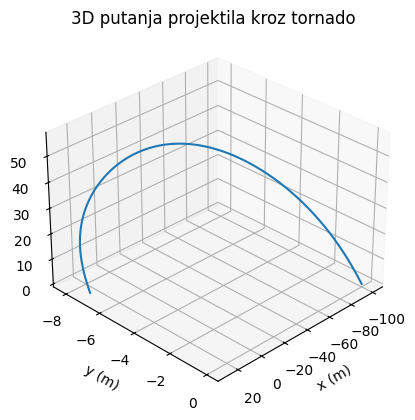

In [42]:
# 3D prikaz putanje
fig = figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(r[:imax, 0], r[:imax, 1], r[:imax, 2])
ax.set_xlabel("x (m)")
ax.set_ylabel("y (m)")
ax.set_zlabel("z (m)")
ax.set_title("3D putanja projektila kroz tornado")
ax.view_init(elev=30, azim=45)  # ugao pogleda
grid(True)

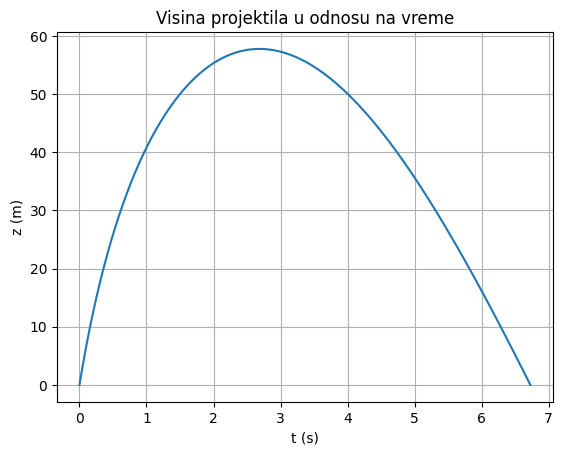

In [43]:
# Visina u zavisnosti od vremena
figure()
plot(t[:imax], r[:imax, 2])
xlabel("t (s)")
ylabel("z (m)")
title("Visina projektila u odnosu na vreme")
grid(True)

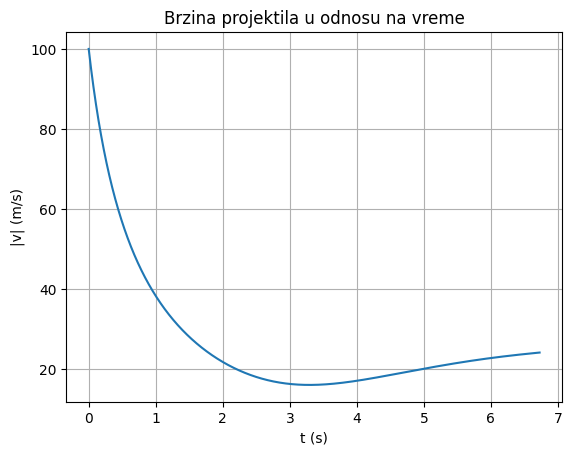

In [44]:
# Brzina u zavisnosti od vremena
brzina = [norm(v[i]) for i in range(imax)]
figure()
plot(t[:imax], brzina)
xlabel("t (s)")
ylabel("|v| (m/s)")
title("Brzina projektila u odnosu na vreme")
grid(True)

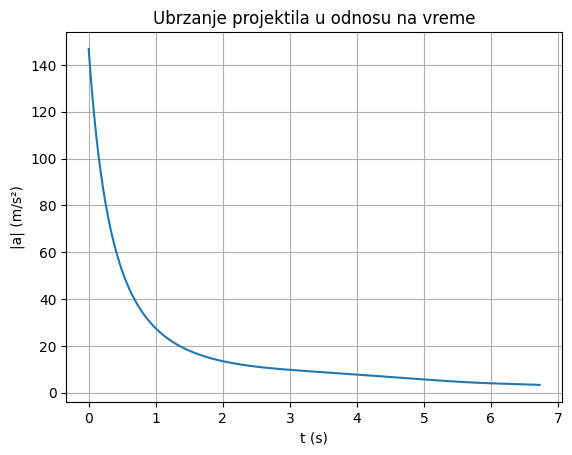

In [45]:
# Ubrzanje u zavisnosti od vremena
ubrzanje = [norm(a[i]) for i in range(imax)]
figure()
plot(t[:imax], ubrzanje)
xlabel("t (s)")
ylabel("|a| (m/s²)")
title("Ubrzanje projektila u odnosu na vreme")
grid(True)